Calling all concerned Libraries

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.svm import SVC 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.optimizers import SGD
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
from sklearn.metrics import matthews_corrcoef
import time

# Loading the datasets

In [3]:
train_data=pd.read_csv('train_imperson_without4n7_balanced_data.csv')
train_data.head()

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36865,0,0,0,0,...,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36867,0,0,0,0,...,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36871,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36876,0,0,0,0,...,0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36880,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.004566,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0


Checking if the datset is balanced and does not contain NULL values

In [ ]:
train_data.loc[:,"155"].value_counts()

1    48522
0    48522
Name: 155, dtype: int64

In [4]:
test_data=pd.read_csv('test_imperson_without4n7_balanced_data.csv')
test_data.head()

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.002547,0.002547,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88219,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.22215,0.0,0.47729,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674,0
1,0,0,0,0.003296,0.003296,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.35106,0.0,0.18516,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674,0
2,0,0,0,0.003285,0.003285,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.43700,0.0,0.47541,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674,0
3,0,0,0,0.005942,0.005942,0.00000,0.00000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.00000,0
4,0,0,0,0.001519,0.001519,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.63621,0.0,0.89971,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674,0


In [ ]:
test_data.loc[:,"155"].value_counts()

1    20079
0    20079
Name: 155, dtype: int64

Checking if there are NULL values

In [ ]:
train_data.isnull().sum()

1      0
2      0
3      0
5      0
6      0
      ..
151    0
152    0
153    0
154    0
155    0
Length: 153, dtype: int64

In [ ]:
test_data.isnull().sum()

1      0
2      0
3      0
5      0
6      0
      ..
151    0
152    0
153    0
154    0
155    0
Length: 153, dtype: int64

# Splitting the test and train datasets into X and Y

In [5]:
x_train= train_data.iloc[0:,0:152]
y_train=train_data.iloc[0:,-1:]
x_test= test_data.iloc[0:,0:152]
y_test=test_data.iloc[0:,-1:]

In [ ]:
x_test.head()

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154
0,0,0,0,0.002547,0.002547,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88219,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.22215,0.0,0.47729,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674
1,0,0,0,0.003296,0.003296,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.35106,0.0,0.18516,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674
2,0,0,0,0.003285,0.003285,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.43700,0.0,0.47541,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674
3,0,0,0,0.005942,0.005942,0.00000,0.00000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.00000
4,0,0,0,0.001519,0.001519,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.63621,0.0,0.89971,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674


In [ ]:
x_train.head()

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36865,0,0,0,0,...,0,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36867,0,0,0,0,...,0,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36871,0,0,0,0,...,0,0,0.0,1,0.001459,0.46154,0.000000,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36876,0,0,0,0,...,0,0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36880,0,0,0,0,...,0,0,0.0,1,0.001459,0.46154,0.004566,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0


Looking at the distribution of the datasets

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 97044.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <a list of 20 Patch objects>)

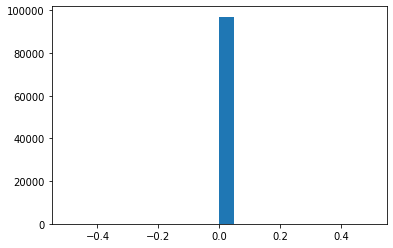

In [ ]:
plt.hist(x_train.loc[:,"10"],bins=20)

(array([30306.,   399.,   930.,   428.,   399.,   399.,   568.,   437.,
          407.,  1699.,   453.,   431.,   413.,   369.,   414.,   403.,
          441.,   411.,   423.,   428.]),
 array([0.      , 0.049993, 0.099986, 0.149979, 0.199972, 0.249965,
        0.299958, 0.349951, 0.399944, 0.449937, 0.49993 , 0.549923,
        0.599916, 0.649909, 0.699902, 0.749895, 0.799888, 0.849881,
        0.899874, 0.949867, 0.99986 ]),
 <a list of 20 Patch objects>)

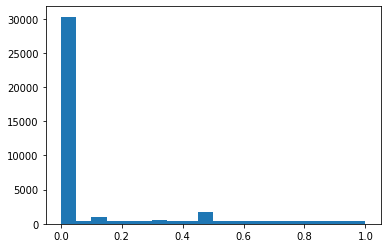

In [ ]:
plt.hist(x_test.loc[:,"140"],bins=20)

(array([48522.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 48522.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

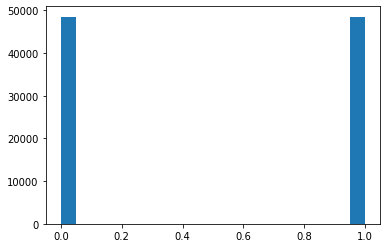

In [ ]:
plt.hist(y_train.loc[:,"155"],bins=20)

(array([20079.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 20079.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

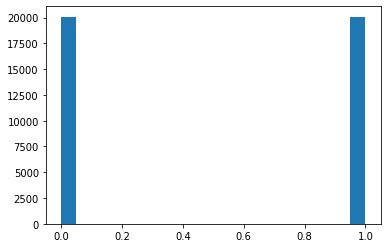

In [ ]:
plt.hist(y_test.loc[:,"155"],bins=20)

#Trial prediction of the dataset using all the features into Logistic Regression Model

In [ ]:
model1=LogisticRegression(solver='liblinear')
model1.fit(x_train,np.ravel(y_train))
p=model1.predict(x_test)
acc_model1 = accuracy_score(y_test,p)
cm_model1= confusion_matrix(y_test,p)
print(acc_model1)
print(cm_model1)

0.8707604960406394
[[19197   882]
 [ 4308 15771]]


# Defining first autoencoder model(AE2)..If possible,Please do not run the following cells, as this will create a new autoencoder. The encoder2 has been saved in 'encoded2.h5'

In [ ]:
def AE2(input_size,hsize1,code_size,hsize2):
    input_l = Input(shape=(input_size))
    hidden1= Dense(hsize1, activation='relu')(input_l)
    code = Dense(code_size, activation='relu',activity_regularizer = l2(10e-6))(hidden1)
    hidden2= Dense(hsize2, activation='relu')(code)
    output_l = Dense(input_size, activation='sigmoid')(hidden2)
    autoencoder2 = Model(input_l, output_l)
    encoded2 = Model(input_l, code)
    return autoencoder2, encoded2

The next chunk is not the actual autoencoder, it is just to check the time taken

In [ ]:
# Dummy code just to check the time taken by autoencoder-Not the actual autoencoder#
start=time.time()
autoencoder2,encoded2= AE2(152,100,50,100)
autoencoder2.compile(optimizer= RMSprop(lr=10e-6), loss='mse')
autoencoder2.fit(x_train, x_train, epochs=15,batch_size=40)
end=time.time()
print(f"Runtime of the program is {end-start}")

Epoch 1/15
2427/2427 [==============================] - 6s 2ms/step - loss: 0.1456
Epoch 2/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0194
Epoch 3/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0115
Epoch 4/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0055
Epoch 5/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0036
Epoch 6/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0028
Epoch 7/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0023
Epoch 8/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0020
Epoch 9/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0016
Epoch 10/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0014
Epoch 11/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 12/15
2427/2427 [==============================] - 5s 2ms/step - loss: 9.9839e-

Defining first autoencoder model(AE2)..If possible,Please do not run the following cells, as this will create a new autoencoder. The encoder2 has been saved in 'encoded2.h5'

In [ ]:
autoencoder2,encoded2= AE2(152,100,50,100)
autoencoder2.compile(optimizer= RMSprop(lr=10e-6), loss='mse')
autoencoder2.fit(x_train, x_train, epochs=15,batch_size=40)

Epoch 1/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.1470
Epoch 2/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0204
Epoch 3/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0128
Epoch 4/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0067
Epoch 5/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0039
Epoch 6/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0029
Epoch 7/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0023A: 0s - loss: 
Epoch 8/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0019
Epoch 9/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0017
Epoch 10/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0014
Epoch 11/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 12/15
2427/2427 [==============================] - 5s 2ms/step - 

In [ ]:
predictions2=autoencoder2.predict(x_test)
print('Mean Squared Error:', metrics.mean_squared_error(x_test, predictions2))

Mean Squared Error: 0.0161755669548177


In [ ]:
encoded2.summary()

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 152)]             0         
                                                                 
 dense_52 (Dense)            (None, 100)               15300     
                                                                 
 dense_53 (Dense)            (None, 50)                5050      
                                                                 
Total params: 20,350
Trainable params: 20,350
Non-trainable params: 0
_________________________________________________________________


# Please do not run this cell. Running it will overwrite the encoder model already saved and hence differ from the results throughout till the end

In [ ]:
# Please do not run this cell...Encoder model will be overwritten # 
encoded2.compile(optimizer=RMSprop(lr=10e-6),loss='mse')
encoded2.save('encoded2.h5')

Even if the above cells were run for verification.Please load the 'encoded2.h5' mailed to the TA only and not if it is overwritten here.

# Using the encoded or code layer to predict class variables thorugh Logistic Regression to ascertain encoding was successful

In [7]:
# This code block can be run.....
# load the model from file
encoder2 = load_model('encoded2.h5')
# encode the train data
x_train_encode2 = encoder2.predict(x_train)
# encode the test data
x_test_encode2 = encoder2.predict(x_test)
# define the model
model2 = LogisticRegression(solver='liblinear')
# fit the model on the training set
model2.fit(x_train_encode2, np.ravel(y_train))
# make predictions on the test set
yhat2 = model2.predict(x_test_encode2)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat2)
print(acc)
cm = confusion_matrix(y_test,yhat2)
print(cm)

0.9350316250809303
[[17498  2581]
 [   28 20051]]


# Defining second autoencoder model(AE3)..If possible, Please do not run the following cells, as this will create a new autoencoder. The encoder3 has been saved in 'encoded3.h5'

In [ ]:
def AE3(input_size,hsize1,hsize2,code_size,hsize3,hsize4):
    np.random.seed(100)
    input_l = Input(shape=(input_size,))
    hidden1= Dense(hsize1, activation='relu')(input_l)
    hidden2= Dense(hsize2, activation='relu')(hidden1)
    code = Dense(code_size, activation='relu',activity_regularizer = l2(10e-6))(hidden2)
    hidden3= Dense(hsize3, activation='relu')(code)
    hidden4= Dense(hsize4, activation='relu')(hidden3)
    output_l = Dense(input_size, activation='sigmoid')(hidden4)
    autoencoder3 = Model(input_l, output_l)
    encoded3 = Model(input_l, code)
    return autoencoder3, encoded3

The next code chunk is a dummy chunk just to check time taken by autoencoder

In [ ]:
# Dummy chunk just to check the time taken by autoencoder # 
start = time.time()
autoencoder3,encoded3= AE3(152,100,50,25,50,100)
autoencoder3.compile(optimizer=RMSprop(lr=10e-6), loss='mse')
autoencoder3.fit(x_train, x_train, epochs=15,batch_size=40)
end=time.time()
print(f"Runtime of the program is {end-start}")

Epoch 1/15
2427/2427 [==============================] - 7s 2ms/step - loss: 0.1617
Epoch 2/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0217
Epoch 3/15
2427/2427 [==============================] - 6s 2ms/step - loss: 0.0128
Epoch 4/15
2427/2427 [==============================] - 6s 2ms/step - loss: 0.0071
Epoch 5/15
2427/2427 [==============================] - 6s 2ms/step - loss: 0.0041
Epoch 6/15
2427/2427 [==============================] - 6s 2ms/step - loss: 0.0029
Epoch 7/15
2427/2427 [==============================] - 6s 2ms/step - loss: 0.0024
Epoch 8/15
2427/2427 [==============================] - 6s 2ms/step - loss: 0.0021
Epoch 9/15
2427/2427 [==============================] - 6s 2ms/step - loss: 0.0018
Epoch 10/15
2427/2427 [==============================] - 6s 2ms/step - loss: 0.0016
Epoch 11/15
2427/2427 [==============================] - 6s 2ms/step - loss: 0.0014
Epoch 12/15
2427/2427 [==============================] - 6s 2ms/step - loss: 0.0013
E

Please,Do not run the following cell, if possible....New autoencoder will be created

In [ ]:
# Actual autoencoder code,running it will create a new one and results below may differ# 
autoencoder3,encoded3= AE3(152,100,50,25,50,100)
autoencoder3.compile(optimizer=RMSprop(lr=10e-6), loss='mse')
autoencoder3.fit(x_train, x_train, epochs=15,batch_size=40)

Epoch 1/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.1680
Epoch 2/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0232
Epoch 3/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0140
Epoch 4/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0084
Epoch 5/15
2427/2427 [==============================] - 4s 2ms/step - loss: 0.0052
Epoch 6/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0035
Epoch 7/15
2427/2427 [==============================] - 4s 2ms/step - loss: 0.0027
Epoch 8/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0022
Epoch 9/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0019
Epoch 10/15
2427/2427 [==============================] - 4s 2ms/step - loss: 0.0017
Epoch 11/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0015
Epoch 12/15
2427/2427 [==============================] - 5s 2ms/step - loss: 0.0013
E

In [ ]:
predictions3=autoencoder3.predict(x_test)
print('Mean Squared Error:', metrics.mean_squared_error(x_test, predictions3))

Mean Squared Error: 0.01842191208700395


# Please do not run this cell. The existing encoder model will be overwritten and results throughout may vary

In [ ]:
# Please do not run this cell...Encoder model will be overwritten # 
encoded3.compile(optimizer=RMSprop(lr=10e-6), loss='mse')
encoded3.save('encoded3.h5')

Even if the above cells were run for verification.Please load the 'encoded3.h5' mailed to the TA only and not if it is overwritten here.

# Using the encoded or code layer to predict class variables through Logistic Regression to ascertain encoding was successful

In [8]:
# Can run all the cells from here
# load the model from file
encoder3 = load_model('encoded3.h5')
# encode the train data
x_train_encode3 = encoder3.predict(x_train)
# encode the test data
x_test_encode3 = encoder3.predict(x_test)
# define the model
model3 = LogisticRegression(solver='liblinear')
# fit the model on the training set
model3.fit(x_train_encode3, np.ravel(y_train))
# make predictions on the test set
yhat3 = model3.predict(x_test_encode3)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat3)
print(acc)
cm = confusion_matrix(y_test,yhat3)
print(cm)

0.9426515264704417
[[19249   830]
 [ 1473 18606]]


# Checking PCA for feature extraction and using the principal components to predict class variables through Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_st = sc.fit_transform(x_train)
x_test_st = sc.transform(x_test)

In [ ]:
# we put 0.95 here to return as few principal components as possible which account for 95% variation
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_train_st = pca.fit_transform(x_train_st)
x_test_st = pca.transform(x_test_st)

In [ ]:
print(pca.explained_variance_)

[12.78968019 11.98783161  7.75024674  5.08228454  3.42978889  3.06246381
  2.82046923  2.45916195  2.15037393  1.95035693  1.74245582  1.64786638
  1.467943    1.35781713  1.33749314  1.19347954  1.10531897  1.05851075
  1.0141258   1.0066591   1.00052358  0.93934526  0.90587771  0.8443942
  0.74703886  0.70382278  0.66673511  0.57962807  0.56661605  0.55247339
  0.5323229 ]


As we see above , that 31 principal components account for 95% variation which is a lot. hence entering n_components =31 below

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=31)
x_train_st = pca.fit_transform(x_train_st)
x_test_st = pca.transform(x_test_st)

In [ ]:
modelpca=LogisticRegression(solver='liblinear')
modelpca.fit(x_train_st,np.ravel(y_train))
p=modelpca.predict(x_test_st)
acc_modelpca = accuracy_score(y_test,p)
cm_modelpca= confusion_matrix(y_test,p)
print(acc_modelpca)
print(cm_modelpca)

0.5172070322227202
[[19303   776]
 [18612  1467]]


As we see above, we get only 51% accuracy with PCA. Hence using autoencoders for feature extraction is a better option

# Going ahead with autoencoder models as extracted features of autoencoders predicted better

Dataframe storing the extracted features from encoder2 of autoencoder2)...These are numbered from 155(155 number of class variable column(y) has been ignored)

In [9]:
df3=pd.DataFrame(x_train_encode2)
df4=pd.DataFrame(x_test_encode2)
df3=df3.rename(columns={x:y for x,y in zip(df3.columns,range(155,205))})
df4=df4.rename(columns={x:y for x,y in zip(df4.columns,range(155,205))})
df3.columns =df3.columns.astype(str)
df4.columns =df4.columns.astype(str)

Combining the original and extracted features(from encoder2 of autoencoder2)

In [10]:
x_train_com2 = pd.concat([x_train, df3], axis=1)
x_test_com2=  pd.concat([x_test, df4], axis=1)

Dataframe storing the extracted features from encoder 3 of autoencoder3...These are numbered from 155(155 number of class variable column(y) has been ignored)

In [11]:
df1=pd.DataFrame(x_train_encode3)
df2=pd.DataFrame(x_test_encode3)
df1=df1.rename(columns={x:y for x,y in zip(df1.columns,range(155,180))})
df2=df2.rename(columns={x:y for x,y in zip(df2.columns,range(155,180))})
df1.columns =df1.columns.astype(str)
df2.columns =df2.columns.astype(str)

Combining the original and extracted features(from encoder2 of autoencoder2)

In [12]:
x_train_com3 = pd.concat([x_train, df1], axis=1)
x_test_com3=  pd.concat([x_test, df2], axis=1)

Running mutual information on extracted features(encoder2) + original features

In [70]:
mutual_info2 = pd.Series(mutual_info_classif(x_train_com2, y_train))
mutual_info2.index = x_train_com2.columns

In [ ]:
mutual_info2.head(10)

1     0.000000
2     0.000000
3     0.000000
5     0.446422
6     0.446206
8     0.634048
9     0.633909
10    0.001152
11    0.000869
12    0.001806
dtype: float64

Top 20 features after mutual information(original +encoder2 extracted)

In [72]:
mutual_info2.sort_values(ascending=False).head(20)

38     0.648676
163    0.645748
187    0.639052
9      0.633967
8      0.633400
204    0.616267
157    0.607321
174    0.588542
194    0.585607
82     0.581619
140    0.574374
142    0.574344
171    0.568055
201    0.562260
196    0.561568
177    0.561537
195    0.561145
186    0.557297
181    0.556807
159    0.554390
dtype: float64

Creating a list of top 20

In [73]:
mi2_top20=mutual_info2.sort_values(ascending=False).index[0:20].tolist()

In [ ]:
mutual_info2.sort_values(ascending=False).index

Index(['38', '163', '187', '8', '9', '204', '157', '174', '194', '82',
       ...
       '83', '84', '85', '86', '87', '95', '96', '99', '100', '1'],
      dtype='object', length=202)

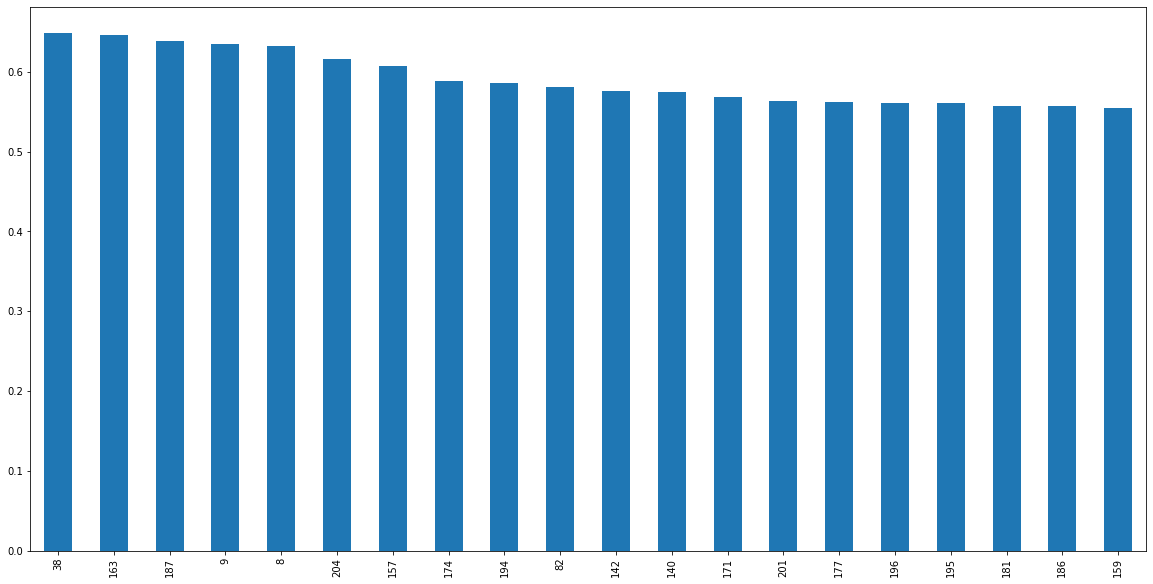

In [62]:
mutual_info2.sort_values(ascending=False).head(20).plot.bar(figsize=(20, 10))

Running mutual information on extracted features(encoder3) + original features

In [45]:
mutual_info3 = pd.Series(mutual_info_classif(x_train_com3, y_train))
mutual_info3.index = x_train_com3.columns

In [46]:
mutual_info3.head(10)

1     0.000759
2     0.000948
3     0.000000
5     0.446311
6     0.445944
8     0.633100
9     0.633070
10    0.000000
11    0.000000
12    0.000314
dtype: float64

In [48]:
mutual_info3.sort_values(ascending=False).head(20)

175    0.649871
38     0.648651
8      0.633100
9      0.633070
167    0.625455
170    0.585055
158    0.582275
82     0.581508
156    0.575179
140    0.573958
142    0.573336
177    0.566826
168    0.562797
64     0.537865
166    0.534780
79     0.525675
159    0.525513
179    0.523351
154    0.523071
173    0.503575
dtype: float64

In [49]:
mi3_top20=mutual_info3.sort_values(ascending=False).index[0:20].tolist()

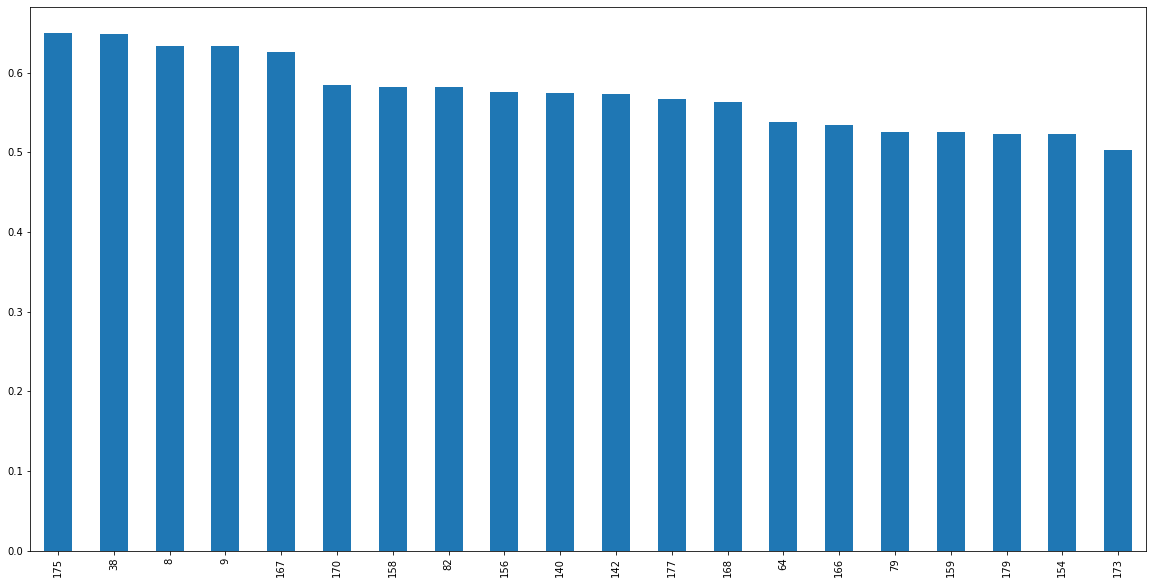

In [50]:
mutual_info3.sort_values(ascending=False).head(20).plot.bar(figsize=(20, 10))

In [92]:
params_rf2 = {
    'bootstrap': [True],
    'max_depth': [5,10,15],
    'max_features': ['auto'],
    'min_samples_leaf': [4,5,6],
    'min_samples_split': [4,5,6],
    'n_estimators': [500,1000,1500,2000]
}

In [93]:
ran_f2= RandomForestClassifier()

In [95]:
search_rf2 = RandomizedSearchCV(estimator = ran_f2, param_distributions = params_rf2, cv = 4, verbose = 2,n_jobs=-1)

In [96]:
search_rf2.fit(x_train_com2[mi2_top20],y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 10, 15],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [4, 5, 6],
                                        'min_samples_split': [4, 5, 6],
                                        'n_estimators': [500, 1000, 1500,
                                                         2000]},
                   verbose=2)

In [97]:
search_rf2.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 1000}

# Training different algorithms and testing them on test data to predict class variables

Random forest model trained on top 20 obtained from MI on (orginal+ encoder2 extracted).With every iteration a variable is added to the trainig and prediction

In [63]:
rfmodel2 = RandomForestClassifier(n_estimators=30, criterion='gini', min_samples_split=10, min_samples_leaf=10, max_features='auto',max_depth=5, bootstrap=True, n_jobs=-1, random_state=42)
for i in range(1,21):
    mi2_top20=mutual_info2.sort_values(ascending=False).index[0:i].tolist()
    rfmodel2.fit(x_train_com2[mi2_top20],y_train)
    y_pred = rfmodel2.predict(x_test_com2[mi2_top20])
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test,y_pred)
    print("With top"+" "+str(i)+" "+ "predictors"+ " "+"\n") 
    print(cm)
    print(acc)
    print("\n\n\n")

With top 1 predictors 

[[12371  7708]
 [    0 20079]]
0.808058170227601




With top 2 predictors 

[[11305  8774]
 [    0 20079]]
0.7815130235569501




With top 3 predictors 

[[17395  2684]
 [    3 20076]]
0.9330892972757607




With top 4 predictors 

[[17618  2461]
 [18608  1471]]
0.475347377857463




With top 5 predictors 

[[18348  1731]
 [18610  1469]]
0.4934757707057124




With top 6 predictors 

[[18616  1463]
 [18621  1458]]
0.4998754918073609




With top 7 predictors 

[[19234   845]
 [18470  1609]]
0.5190248518352507




With top 8 predictors 

[[19569   510]
 [18611  1468]]
0.5238557697096469




With top 9 predictors 

[[13767  6312]
 [18608  1471]]
0.37945116788684696




With top 10 predictors 

[[19442   637]
 [18615  1464]]
0.5205936550625031




With top 11 predictors 

[[19597   482]
 [18639  1440]]
0.5238557697096469




With top 12 predictors 

[[19867   212]
 [18617  1462]]
0.531127048159769




With top 13 predictors 

[[19962   117]
 [18643  1436]]
0.53284

Random forest model trained on top 20 obtained from MI on (orginal+ encoder3 extracted).With every iteration a variable is added(MI Rankwise) to the training and prediction

In [64]:
rfmodel3 = RandomForestClassifier(n_estimators=30, criterion='gini', min_samples_split=2, min_samples_leaf=2, max_features='auto',max_depth=5, bootstrap=True,random_state=74)
for i in range(1,21):
    mi3_top20=mutual_info3.sort_values(ascending=False).index[0:i].tolist()
    rfmodel3.fit(x_train_com3[mi3_top20],y_train)
    y_pred = rfmodel3.predict(x_test_com3[mi3_top20])
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test,y_pred)
    print("With top"+" "+str(i)+" "+ "predictors"+ " "+"\n") 
    print(cm)
    print(acc)
    print("\n\n\n")

With top 1 predictors 

[[19378   701]
 [15391  4688]]
0.599282832810399




With top 2 predictors 

[[12672  7407]
 [ 8257 11822]]
0.6099407341003038




With top 3 predictors 

[[14098  5981]
 [ 8257 11822]]
0.6454504706409682




With top 4 predictors 

[[15683  4396]
 [   12 20067]]
0.8902335773693909




With top 5 predictors 

[[19198   881]
 [ 8358 11721]]
0.7699337616415161




With top 6 predictors 

[[19599   480]
 [ 8269 11810]]
0.7821355645201454




With top 7 predictors 

[[19957   122]
 [12909  7170]]
0.675506748344041




With top 8 predictors 

[[19947   132]
 [18653  1426]]
0.5322227202549927




With top 9 predictors 

[[19814   265]
 [ 8591 11488]]
0.7794710891976692




With top 10 predictors 

[[19961   118]
 [12296  7783]]
0.6908710593157029




With top 11 predictors 

[[19757   322]
 [18609  1470]]
0.5285870810299318




With top 12 predictors 

[[20049    30]
 [18640  1439]]
0.5350864086856916




With top 13 predictors 

[[19987    92]
 [18647  1432]]
0.53336

In [ ]:
xgb_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.0,1.2,1.4,1.6,1.8,2.0],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.0],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.0]}

In [ ]:
xgb_3=  XGBClassifier()

In [ ]:
search_xgb = GridSearchCV(estimator = xgb_3, param_grid = xgb_grid, cv = 4, verbose = 2,n_jobs=-1)

In [ ]:
search_xgb.fit(x_train_com3[mi3_top20],y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.2min finished


[23:52:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_jobs=-1,
                   par

In [ ]:
search3_2.best_params_

{'reg_lambda': 0.8,
 'reg_alpha': 0.8,
 'n_estimators': 115,
 'max_depth': 6,
 'learning_rate': 0.4,
 'gamma': 1.2}

XG Boost model trained on top 20 obtained from MI on (orginal+ encoder2 extracted).With every iteration a variable is added(MI Rankwise) to the training and prediction

In [65]:
xgbmodel2 = XGBClassifier(reg_lambda= 0.5,reg_alpha= 0.6,n_estimators= 30,max_depth=11,learning_rate= 0.4,gamma=1.2)
for i in range(1,21):
    mi2_top20=mutual_info2.sort_values(ascending=False).index[0:i].tolist()
    xgbmodel2.fit(x_train_com2[mi2_top20],y_train)
    y_pred = xgbmodel2.predict(x_test_com2[mi2_top20])
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test,y_pred)
    print("With top"+" "+str(i)+" "+ "predictors"+ " "+"\n") 
    print(cm)
    print(acc)
    print("\n\n\n")

With top 1 predictors 

[[12371  7708]
 [    0 20079]]
0.808058170227601




With top 2 predictors 

[[12456  7623]
 [    0 20079]]
0.8101748095024652




With top 3 predictors 

[[17297  2782]
 [    0 20079]]
0.9307236416156183




With top 4 predictors 

[[12358  7721]
 [    0 20079]]
0.8077344489267394




With top 5 predictors 

[[12358  7721]
 [    0 20079]]
0.8077344489267394




With top 6 predictors 

[[12561  7518]
 [ 1872 18207]]
0.7661736142238159




With top 7 predictors 

[[12581  7498]
 [18603  1476]]
0.3500423327854973




With top 8 predictors 

[[12800  7279]
 [18605  1474]]
0.3554459883460332




With top 9 predictors 

[[13198  6881]
 [18612  1467]]
0.3651825290104089




With top 10 predictors 

[[13387  6692]
 [18606  1473]]
0.37003834852333284




With top 11 predictors 

[[13387  6692]
 [18606  1473]]
0.37003834852333284




With top 12 predictors 

[[13330  6749]
 [ 3653 16426]]
0.740973156033667




With top 13 predictors 

[[13459  6620]
 [ 3653 16426]]
0.744

XG Boost model trained on top 20 obtained from MI on (orginal+ encoder3 extracted).With every iteration a variable is added(MI Rankwise) to the training and prediction

In [ ]:
xgbmodel3 = XGBClassifier(reg_lambda= 0.2,reg_alpha=0.5,n_estimators= 30 ,max_depth= 4,learning_rate= 1.2,gamma= 0.7)
for i in range(1,21):
    mi3_top20=mutual_info3.sort_values(ascending=False).index[0:i].tolist()
    xgbmodel3.fit(x_train_com3[mi3_top20],y_train)
    y_pred = xgbmodel3.predict(x_test_com3[mi3_top20])
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test,y_pred)
    print("With top"+" "+str(i)+" "+ "predictors"+ " "+"\n") 
    print(cm)
    print(acc)
    print("\n\n\n")

With top 1 predictors 

[[19362   717]
 [15433  4646]]
0.5978385377757857




With top 2 predictors 

[[12486  7593]
 [ 3569 16510]]
0.7220479107525275




With top 3 predictors 

[[14636  5443]
 [    0 20079]]
0.8644603814931022




With top 4 predictors 

[[14636  5443]
 [    0 20079]]
0.8644603814931022




With top 5 predictors 

[[16374  3705]
 [ 8265 11814]]
0.7019273868220529




With top 6 predictors 

[[13831  6248]
 [18608  1471]]
0.3810448727526271




With top 7 predictors 

[[19388   691]
 [ 8264 11815]]
0.7770058269834155




With top 8 predictors 

[[17554  2525]
 [ 8257 11822]]
0.7315105333930972




With top 9 predictors 

[[16938  3141]
 [ 8257 11822]]
0.7161711240599632




With top 10 predictors 

[[17158  2921]
 [ 8257 11822]]
0.7216494845360825




With top 11 predictors 

[[16530  3549]
 [ 8257 11822]]
0.7060112555406146




With top 12 predictors 

[[17777  2302]
 [ 8287 11792]]
0.7363165496289655




With top 13 predictors 

[[17777  2302]
 [ 8287 11792]]
0.736

AdaBoost model trained on top 20 obtained from MI on (orginal+ encoder2 extracted).With every iteration a variable is added(MI Rankwise) to the training and prediction

In [66]:
adbmodel2 = AdaBoostClassifier(n_estimators=30,base_estimator=None, learning_rate = 0.15, random_state= 42)
for i in range(1,21):
    mi2_top20=mutual_info2.sort_values(ascending=False).index[0:i].tolist()
    adbmodel2.fit(x_train_com2[mi2_top20],y_train)
    y_pred = adbmodel2.predict(x_test_com2[mi2_top20])
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test,y_pred)
    print("With top"+" "+str(i)+" "+ "predictors"+ " "+"\n") 
    print(cm)
    print(acc)
    print("\n\n\n")

With top 1 predictors 

[[12371  7708]
 [    0 20079]]
0.808058170227601




With top 2 predictors 

[[16908  3171]
 [    3 20076]]
0.9209621993127147




With top 3 predictors 

[[17266  2813]
 [    3 20076]]
0.9298769859056726




With top 4 predictors 

[[19178   901]
 [  129 19950]]
0.9743513123163504




With top 5 predictors 

[[19178   901]
 [  129 19950]]
0.9743513123163504




With top 6 predictors 

[[19178   901]
 [  129 19950]]
0.9743513123163504




With top 7 predictors 

[[18312  1767]
 [  129 19950]]
0.9527864933512625




With top 8 predictors 

[[18312  1767]
 [  129 19950]]
0.9527864933512625




With top 9 predictors 

[[18312  1767]
 [  129 19950]]
0.9527864933512625




With top 10 predictors 

[[18310  1769]
 [  129 19950]]
0.9527366900742069




With top 11 predictors 

[[18312  1767]
 [  129 19950]]
0.9527864933512625




With top 12 predictors 

[[18312  1767]
 [  129 19950]]
0.9527864933512625




With top 13 predictors 

[[17092  2987]
 [    0 20079]]
0.9256

AdaBoost model trained on top 20 obtained from MI on (orginal+ encoder3 extracted).With every iteration a variable is added(MI Rankwise) to the training and prediction

In [ ]:
adbmodel3 = AdaBoostClassifier(n_estimators=30,base_estimator=None, learning_rate =0.1 , random_state= 42)
for i in range(1,21):
    mi3_top20=mutual_info3.sort_values(ascending=False).index[0:i].tolist()
    adbmodel3.fit(x_train_com3[mi3_top20],y_train)
    y_pred = adbmodel3.predict(x_test_com3[mi3_top20])
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test,y_pred)
    print("With top"+" "+str(i)+" "+ "predictors"+ " "+"\n") 
    print(cm)
    print(acc)
    print("\n\n\n")

With top 1 predictors 

[[19460   619]
 [15391  4688]]
0.6013247671696798




With top 2 predictors 

[[19460   619]
 [15391  4688]]
0.6013247671696798




With top 3 predictors 

[[19550   529]
 [20079     0]]
0.4868270332187858




With top 4 predictors 

[[19550   529]
 [20079     0]]
0.4868270332187858




With top 5 predictors 

[[19115   964]
 [18784  1295]]
0.5082424423527068




With top 6 predictors 

[[19364   715]
 [  197 19882]]
0.9772897056626326




With top 7 predictors 

[[19364   715]
 [  197 19882]]
0.9772897056626326




With top 8 predictors 

[[19711   368]
 [10546  9533]]
0.7282235171074257




With top 9 predictors 

[[19467   612]
 [  197 19882]]
0.9798545744309975




With top 10 predictors 

[[19165   914]
 [  150 19929]]
0.9735046566064047




With top 11 predictors 

[[19425   654]
 [  200 19879]]
0.9787340006972459




With top 12 predictors 

[[19425   654]
 [  200 19879]]
0.9787340006972459




With top 13 predictors 

[[19214   865]
 [  180 19899]]
0.973

SVM(Radial) model trained on top 20 obtained from MI on (orginal+ encoder2 extracted).With every iteration a variable is added(MI Rankwise) to the training and prediction

In [67]:
rbfmodel2 = SVC(C=1,gamma=0.001, max_iter=100, random_state=42,kernel='rbf',verbose=0)
for i in range(1,21):
    mi2_top20=mutual_info2.sort_values(ascending=False).index[0:i].tolist()
    rbfmodel2.fit(x_train_com2[mi2_top20],y_train)
    y_pred = rbfmodel2.predict(x_test_com2[mi2_top20])
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test,y_pred)
    print("With top"+" "+str(i)+" "+ "predictors"+ " "+"\n") 
    print(cm)
    print(acc)
    print("\n\n\n")

With top 1 predictors 

[[   12 20067]
 [    0 20079]]
0.5002988196623338




With top 2 predictors 

[[   12 20067]
 [    0 20079]]
0.5002988196623338




With top 3 predictors 

[[17557  2522]
 [    6 20073]]
0.9370486578016833




With top 4 predictors 

[[16617  3462]
 [15894  4185]]
0.5180038846556103




With top 5 predictors 

[[19518   561]
 [ 6575 13504]]
0.8223019074655112




With top 6 predictors 

[[16704  3375]
 [    5 20074]]
0.9158324617759849




With top 7 predictors 

[[11559  8520]
 [15424  4655]]
0.40375516708999454




With top 8 predictors 

[[16738  3341]
 [    5 20074]]
0.9166791174859306




With top 9 predictors 

[[12555  7524]
 [14376  5703]]
0.45465411624084867




With top 10 predictors 

[[12153  7926]
 [14585  5494]]
0.4394392151003536




With top 11 predictors 

[[12153  7926]
 [14585  5494]]
0.4394392151003536




With top 12 predictors 

[[12153  7926]
 [14586  5493]]
0.4394143134618258




With top 13 predictors 

[[13057  7022]
 [   94 19985]]
0.8

SVM(Radial) model trained on top 20 obtained from MI on (orginal+ encoder3 extracted).With every iteration a variable is added(MI Rankwise) to the training and prediction

In [ ]:
rbfmodel3 = SVC(C=1,gamma=0.09, max_iter=100, random_state=42,kernel='rbf',verbose=0)
for i in range(1,21):
    mi3_top20=mutual_info3.sort_values(ascending=False).index[0:i].tolist()
    rbfmodel3.fit(x_train_com3[mi3_top20],y_train)
    y_pred = rbfmodel3.predict(x_test_com3[mi3_top20])
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test,y_pred)
    print("With top"+" "+str(i)+" "+ "predictors"+ " "+"\n") 
    print(cm)
    print(acc)
    print("\n\n\n")

With top 1 predictors 

[[14340  5739]
 [ 1469 18610]]
0.8205089894915085




With top 2 predictors 

[[14270  5809]
 [ 1468 18611]]
0.8187907764330893




With top 3 predictors 

[[10586  9493]
 [18605  1474]]
0.30031376064545046




With top 4 predictors 

[[ 8285 11794]
 [ 4140 15939]]
0.6032172916977937




With top 5 predictors 

[[18429  1650]
 [ 1470 18609]]
0.9223068877932168




With top 6 predictors 

[[17020  3059]
 [ 1470 18609]]
0.8872204791075253




With top 7 predictors 

[[17395  2684]
 [18606  1473]]
0.46984411574281587




With top 8 predictors 

[[17833  2246]
 [18607  1472]]
0.4807261317794711




With top 9 predictors 

[[18008  2071]
 [18607  1472]]
0.48508391852183874




With top 10 predictors 

[[18016  2063]
 [18607  1472]]
0.48528313163006126




With top 11 predictors 

[[18026  2053]
 [18609  1470]]
0.4854823447382838




With top 12 predictors 

[[13674  6405]
 [18637  1442]]
0.3764131679864535




With top 13 predictors 

[[19284   795]
 [18609  1470]]
0

# Running a LGBM wrapper to select a subset of the top 20 features obtained form MI of(original + extracted from encoder2)

In [88]:
start=time.time()
model_gbm=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
bestmod_gbm = SelectFromModel(model_gbm, max_features=5)
bestmod_gbm.fit(x_train_com2[mi2_top20],y_train)
gbm_support = bestmod_gbm.get_support()
gbm_selections = x_train_com2[mi2_top20].loc[:,gbm_support].columns.tolist()
print(gbm_selections)
end= time.time()
print(f"Runtime of the program is {end-start}")


['38', '163', '187', '9', '196']
Runtime of the program is 3.148191213607788


Creating dataframe of the top 5 features as directed by LGBM wrapper

In [75]:
x_train2_extracted = x_train_com2[['38', '163', '187', '9', '196']]
x_test2_extracted = x_test_com2[['38', '163', '187', '9', '196']]

Random forest model trained on top 5 obtained from LGBM. This model is an extension from encoder 2 side(Refer Roadmap section in Report to see genesis of this model)

In [76]:
start = time.time()
rfextracted2 = RandomForestClassifier(n_estimators=1000, criterion='gini', min_samples_split= 10, min_samples_leaf=8, max_features='auto',max_depth=5, bootstrap=True, n_jobs=-1, random_state=42)
rfextracted2.fit(x_train2_extracted,y_train)
y_pred = rfextracted2.predict(x_test2_extracted)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for rfextracted2 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end = time.time()
print(f"Runtime of the program is {end-start}")


The classification metrics for rfextracted2 are 

The confusion matrix is :
 [[18613  1466]
 [    0 20079]]
The Accuracy is:  0.963494197918223 or 96.349 %
The recall(tpr) is:  0.926988395836446 or 92.699 %
The precision is:  1.0 or 100.0 %
The False Positive Rate is:  0.0 or 0.0 %
The False Negative Rate is:  0.07301160416355396 or 7.301 %
The F-1 Score is:  0.9621110307040215 or 96.211 %
The Matthews correlation coefficient is:  0.9294690639150514 or 92.947 %
Runtime of the program is 52.6687228679657


XG Boost model trained on top 5 obtained from LGBM. This model is an extension from encoder 2 side(Refer Roadmap section in Report to see genesis of this model)

In [77]:
start=time.time()
xgbextracted2 = XGBClassifier(reg_lambda=0.5,reg_alpha=0.6,n_estimators= 30,max_depth=11,learning_rate= 0.4,gamma=1.2)
xgbextracted2.fit(x_train2_extracted,y_train)
y_pred = xgbextracted2.predict(x_test2_extracted)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for xgbextracted2 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end=time.time()
print(f"Runtime of the program is {end-start}")


The classification metrics for xgbextracted2 are 

The confusion matrix is :
 [[12382  7697]
 [    1 20078]]
The Accuracy is:  0.8083071866128791 or 80.831 %
The recall(tpr) is:  0.6166641765028139 or 61.666 %
The precision is:  0.9999192441250101 or 99.992 %
The False Positive Rate is:  4.980327705563026e-05 or 0.005 %
The False Negative Rate is:  0.3833358234971861 or 38.334 %
The F-1 Score is:  0.7628611915470397 or 76.286 %
The Matthews correlation coefficient is:  0.6675991166013439 or 66.76 %
Runtime of the program is 2.305914878845215


Adaboost model trained on top 5 obtained from LGBM. This model is an extension from encoder 2 side(Refer Roadmap section in Report to see genesis of this model)

In [78]:
start = time.time()
adbextracted2 = AdaBoostClassifier(n_estimators=30,base_estimator=None, learning_rate = 0.15, random_state= 42)
adbextracted2.fit(x_train2_extracted,y_train)
y_pred = adbextracted2.predict(x_test2_extracted)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for adbextracted2 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end= time.time()
print(f"Runtime of the program is {end-start}")

The classification metrics for adbextracted2 are 

The confusion matrix is :
 [[18686  1393]
 [   60 20019]]
The Accuracy is:  0.9638179192190847 or 96.382 %
The recall(tpr) is:  0.930624035061507 or 93.062 %
The precision is:  0.9967993171876667 or 99.68 %
The False Positive Rate is:  0.0029881966233378156 or 0.299 %
The False Negative Rate is:  0.06937596493849295 or 6.938 %
The F-1 Score is:  0.9625756600128783 or 96.258 %
The Matthews correlation coefficient is:  0.929686821774473 or 92.969 %
Runtime of the program is 2.798053503036499


SVM(Radial) model trained on top 5 obtained from LGBM. This model is an extension from encoder 2 side(Refer Roadmap section in Report to see genesis of this model)

In [79]:
start=time.time()
rbfextracted2 = SVC(C=1,gamma=0.001, max_iter=100, random_state=42,kernel='rbf',verbose=0)
rbfextracted2.fit(x_train2_extracted,y_train)
y_pred = rbfextracted2.predict(x_test2_extracted)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for rbfextracted2 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end = time.time()
print(f"Runtime of the program is {end-start}")

The classification metrics for rbfextracted2 are 

The confusion matrix is :
 [[19252   827]
 [ 1174 18905]]
The Accuracy is:  0.9501718213058419 or 95.017 %
The recall(tpr) is:  0.9588126898749938 or 95.881 %
The precision is:  0.9425242338196417 or 94.252 %
The False Positive Rate is:  0.058469047263309926 or 5.847 %
The False Negative Rate is:  0.041187310125006225 or 4.119 %
The F-1 Score is:  0.9505986915195656 or 95.06 %
The Matthews correlation coefficient is:  0.9004781203478325 or 90.048 %
Runtime of the program is 1.4851469993591309


# Running a LGBM wrapper to select a subset of the top 20 features obtained form MI of(original + extracted from encoder3)

In [89]:
start = time.time()
model_gbm=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
bestmod_gbm = SelectFromModel(model_gbm, max_features=5)
bestmod_gbm.fit(x_train_com3[mi3_top20],y_train)
gbm_support = bestmod_gbm.get_support()
gbm_selections3 = x_train_com3[mi3_top20].loc[:,gbm_support].columns.tolist()
print(gbm_selections3)
end = time.time()
print(f"Runtime of the program is {end-start}")

['175', '38', '8', '170', '159']
Runtime of the program is 3.054213762283325


Creating dataframe of the top 5 features as directed by LGBM wrapper

In [52]:
x_train3_extracted = x_train_com3[['175', '38', '8', '170', '159']]

In [53]:
x_test3_extracted = x_test_com3[['175', '38', '8', '170', '159']]

SVM(radial) model trained on top 5 obtained from LGBM. This model is an extension from encoder 3 side(Refer Roadmap section in Report to see genesis of this model)

In [54]:
start = time.time()
rbfextracted3 = SVC(C=0.5,gamma=0.7, max_iter=100, random_state=42,kernel='rbf',verbose=0)
rbfextracted3.fit(x_train3_extracted,y_train)
y_pred = rbfextracted3.predict(x_test3_extracted)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for rbfextracted3 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end = time.time()
print(f"Runtime of the program is {end-start}")

The classification metrics for rbfextracted3 are 

The confusion matrix is :
 [[17945  2134]
 [ 1471 18608]]
The Accuracy is:  0.9102295931072265 or 91.023 %
The recall(tpr) is:  0.893719806763285 or 89.372 %
The precision is:  0.9242377420683972 or 92.424 %
The False Positive Rate is:  0.07326062054883212 or 7.326 %
The False Negative Rate is:  0.10628019323671498 or 10.628 %
The F-1 Score is:  0.9087226231168501 or 90.872 %
The Matthews correlation coefficient is:  0.8209068224059788 or 82.091 %
Runtime of the program is 1.5140948295593262


Adaboost model trained on top 5 obtained from LGBM. This model is an extension from encoder 3 side(Refer Roadmap section in Report to see genesis of this model)

In [91]:
start = time.time()
adbextracted3 = AdaBoostClassifier(n_estimators=30,base_estimator=None, learning_rate =0.1 , random_state= 42)
adbextracted3.fit(x_train3_extracted,y_train)
y_pred = adbextracted3.predict(x_test3_extracted)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for adbextracted3 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end = time.time()
print(f"Runtime of the program is {end-start}")

The classification metrics for adbextracted3 are 

The confusion matrix is :
 [[19461   618]
 [  129 19950]]
The Accuracy is:  0.9813984760197221 or 98.14 %
The recall(tpr) is:  0.9692215747796205 or 96.922 %
The precision is:  0.9934150076569679 or 99.342 %
The False Positive Rate is:  0.0064246227401763036 or 0.642 %
The False Negative Rate is:  0.0307784252203795 or 3.078 %
The F-1 Score is:  0.9811691749224836 or 98.117 %
The Matthews correlation coefficient is:  0.9630826002514473 or 96.308 %
Runtime of the program is 3.0054032802581787


XG Boost model trained on top 5 obtained from LGBM. This model is an extension from encoder 3 side(Refer Roadmap section in Report to see genesis of this model)

In [90]:
start = time.time()
xgbextracted3 = XGBClassifier(reg_lambda=1,reg_alpha=0.5,n_estimators= 30 ,max_depth=2,learning_rate= 0.4,gamma= 0.1)
xgbextracted3.fit(x_train3_extracted,y_train)
y_pred = xgbextracted3.predict(x_test3_extracted)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for xgbextracted3 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end = time.time()
print(f"Runtime of the program is {end-start}")

The classification metrics for xgbextracted3 are 

The confusion matrix is :
 [[19184   895]
 [   41 20038]]
The Accuracy is:  0.976692066337965 or 97.669 %
The recall(tpr) is:  0.9554260670352109 or 95.543 %
The precision is:  0.9978673602080624 or 99.787 %
The False Positive Rate is:  0.0020419343592808408 or 0.204 %
The False Negative Rate is:  0.044573932964789086 or 4.457 %
The F-1 Score is:  0.9761856299613271 or 97.619 %
The Matthews correlation coefficient is:  0.9542476264578714 or 95.425 %
Runtime of the program is 1.1674108505249023


Random Forest model trained on top 5 obtained from LGBM. This model is an extension from encoder 3 side(Refer Roadmap section in Report to see genesis of this model)

In [57]:
start = time.time()
rfextracted3 = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=2, max_features='auto',max_depth=20, bootstrap=True,random_state=42)
rfextracted3.fit(x_train3_extracted,y_train)
y_pred = rfextracted3.predict(x_test3_extracted)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for rfextracted3 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end = time.time()
print(f"Runtime of the program is {end-start}")

The classification metrics for rfextracted3 are 

The confusion matrix is :
 [[18904  1175]
 [ 8630 11449]]
The Accuracy is:  0.7558394342347726 or 75.584 %
The recall(tpr) is:  0.9414811494596345 or 94.148 %
The precision is:  0.6865693324616837 or 68.657 %
The False Positive Rate is:  0.42980228099008916 or 42.98 %
The False Negative Rate is:  0.058518850540365555 or 5.852 %
The F-1 Score is:  0.7940688467435364 or 79.407 %
The Matthews correlation coefficient is:  0.5510695502328282 or 55.107 %
Runtime of the program is 8.086498498916626


# Evaluation Metrics of above models

In [80]:
# Evaluating the rfmodel2 with top 3 predictors #
start = time.time()
rfmodel2 = RandomForestClassifier(n_estimators=30, criterion='gini', min_samples_split=10, min_samples_leaf=10, max_features='auto',max_depth=5, bootstrap=True, n_jobs=-1, random_state=42)
best_x_train = x_train_com2[mutual_info2.sort_values(ascending=False).index[0:3].tolist()]
best_x_test = x_test_com2[mutual_info2.sort_values(ascending=False).index[0:3].tolist()]
rfmodel2.fit(best_x_train,y_train)
y_pred = rfmodel2.predict(best_x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for rfmodel2 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end = time.time()
print(f"Runtime of the program is {end-start}")


The classification metrics for rfmodel2 are 

The confusion matrix is :
 [[17395  2684]
 [    3 20076]]
The Accuracy is:  0.9330892972757607 or 93.309 %
The recall(tpr) is:  0.8663280043826884 or 86.633 %
The precision is:  0.999827566386941 or 99.983 %
The False Positive Rate is:  0.00014940983116689077 or 0.015 %
The False Negative Rate is:  0.1336719956173116 or 13.367 %
The F-1 Score is:  0.928302692317955 or 92.83 %
The Matthews correlation coefficient is:  0.8740046326787453 or 87.4 %
Runtime of the program is 1.3697068691253662


In [81]:
# Evaluating the xgbmodel2 with top 3 predictors #
start = time.time()
xgbmodel2 = XGBClassifier(reg_lambda= 0.5,reg_alpha= 0.6,n_estimators= 30,max_depth=11,learning_rate= 0.4,gamma=1.2)
best_x_train = x_train_com2[mutual_info2.sort_values(ascending=False).index[0:3].tolist()]
best_x_test = x_test_com2[mutual_info2.sort_values(ascending=False).index[0:3].tolist()]
xgbmodel2.fit(best_x_train,y_train)
y_pred = xgbmodel2.predict(best_x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for xgbmodel2 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end= time.time()
print(f"Runtime of the program is {end-start}")


The classification metrics for xgbmodel2 are 

The confusion matrix is :
 [[17297  2782]
 [    0 20079]]
The Accuracy is:  0.9307236416156183 or 93.072 %
The recall(tpr) is:  0.8614472832312366 or 86.145 %
The precision is:  1.0 or 100.0 %
The False Positive Rate is:  0.0 or 0.0 %
The False Negative Rate is:  0.13855271676876338 or 13.855 %
The F-1 Score is:  0.9255672089041096 or 92.557 %
The Matthews correlation coefficient is:  0.8698368071299423 or 86.984 %
Runtime of the program is 2.2071151733398438


In [82]:
# Evaluating the adbmodel2 with the top 4 predictors #
start = time.time()
adbmodel2 = AdaBoostClassifier(n_estimators=30,base_estimator=None, learning_rate = 0.15, random_state= 42)
best_x_train = x_train_com2[mutual_info2.sort_values(ascending=False).index[0:4].tolist()]
best_x_test = x_test_com2[mutual_info2.sort_values(ascending=False).index[0:4].tolist()]
adbmodel2.fit(best_x_train,y_train)
y_pred = adbmodel2.predict(best_x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)

tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for adbmodel2 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end = time.time()
print(f"Runtime of the program is {end-start}")

The classification metrics for adbmodel2 are 

The confusion matrix is :
 [[19178   901]
 [  129 19950]]
The Accuracy is:  0.9743513123163504 or 97.435 %
The recall(tpr) is:  0.9551272473728771 or 95.513 %
The precision is:  0.9933184855233853 or 99.332 %
The False Positive Rate is:  0.0064246227401763036 or 0.642 %
The False Negative Rate is:  0.04487275262712286 or 4.487 %
The F-1 Score is:  0.9738485756360128 or 97.385 %
The Matthews correlation coefficient is:  0.9494046169737584 or 94.94 %
Runtime of the program is 2.368513345718384


In [83]:
# Evaluating the rbfmodel2 with the top 3 predictors #
start= time.time()
rbfmodel2 = SVC(C=1,gamma=0.001, max_iter=100, random_state=42,kernel='rbf',verbose=0)
best_x_train = x_train_com2[mutual_info2.sort_values(ascending=False).index[0:3].tolist()]
best_x_test = x_test_com2[mutual_info2.sort_values(ascending=False).index[0:3].tolist()]
rbfmodel2.fit(best_x_train,y_train)
y_pred = rbfmodel2.predict(best_x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for rbfmodel2 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end = time.time()
print(f"Runtime of the program is {end-start}")

The classification metrics for rbfmodel2 are 

The confusion matrix is :
 [[17557  2522]
 [    6 20073]]
The Accuracy is:  0.9370486578016833 or 93.705 %
The recall(tpr) is:  0.8743961352657005 or 87.44 %
The precision is:  0.9996583727153675 or 99.966 %
The False Positive Rate is:  0.00029881966233378154 or 0.03 %
The False Negative Rate is:  0.12560386473429952 or 12.56 %
The F-1 Score is:  0.9328409755060836 or 93.284 %
The Matthews correlation coefficient is:  0.8810414535582425 or 88.104 %
Runtime of the program is 1.4055876731872559


In [84]:
# Evaluating the rfmodel3 with the top 4 predictors #
start=time.time()
rfmodel3 = RandomForestClassifier(n_estimators=30, criterion='gini', min_samples_split=2, min_samples_leaf=2, max_features='auto',max_depth=5, bootstrap=True,random_state=74)
best_x_train = x_train_com3[mutual_info3.sort_values(ascending=False).index[0:4].tolist()]
best_x_test = x_test_com3[mutual_info3.sort_values(ascending=False).index[0:4].tolist()]
rfmodel3.fit(best_x_train,y_train)
y_pred = rfmodel3.predict(best_x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for rfmodel3 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end= time.time()
print(f"Runtime of the program is {end-start}")

The classification metrics for rfmodel3 are 

The confusion matrix is :
 [[15683  4396]
 [   12 20067]]
The Accuracy is:  0.8902335773693909 or 89.023 %
The recall(tpr) is:  0.7810647940634494 or 78.106 %
The precision is:  0.9992354252946798 or 99.924 %
The False Positive Rate is:  0.0005976393246675631 or 0.06 %
The False Negative Rate is:  0.21893520593655064 or 21.894 %
The F-1 Score is:  0.8767820204617879 or 87.678 %
The Matthews correlation coefficient is:  0.799762787757569 or 79.976 %
Runtime of the program is 1.768254041671753


In [85]:
# Evaluating the xgbmodel3 with the top 3 predictors #
start = time.time()
xgbmodel3 = XGBClassifier(reg_lambda= 0.2,reg_alpha=0.5,n_estimators= 30 ,max_depth= 4,learning_rate= 1.2,gamma= 0.7)
best_x_train = x_train_com3[mutual_info3.sort_values(ascending=False).index[0:3].tolist()]
best_x_test = x_test_com3[mutual_info3.sort_values(ascending=False).index[0:3].tolist()]
xgbmodel3.fit(best_x_train,y_train)
y_pred = xgbmodel3.predict(best_x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for xgbmodel3 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end= time.time()
print(f"Runtime of the program is {end-start}")

The classification metrics for xgbmodel3 are 

The confusion matrix is :
 [[14636  5443]
 [    0 20079]]
The Accuracy is:  0.8644603814931022 or 86.446 %
The recall(tpr) is:  0.7289207629862045 or 72.892 %
The precision is:  1.0 or 100.0 %
The False Positive Rate is:  0.0 or 0.0 %
The False Negative Rate is:  0.2710792370137955 or 27.108 %
The F-1 Score is:  0.8432089874693937 or 84.321 %
The Matthews correlation coefficient is:  0.7572753985889467 or 75.728 %
Runtime of the program is 1.1742312908172607


In [86]:
# Evaluating the model adbmodel3 with top 6 predictors #
start = time.time()
adbmodel3 = AdaBoostClassifier(n_estimators=30,base_estimator=None, learning_rate =0.1 , random_state= 42)
best_x_train = x_train_com3[mutual_info3.sort_values(ascending=False).index[0:6].tolist()]
best_x_test = x_test_com3[mutual_info3.sort_values(ascending=False).index[0:6].tolist()]
adbmodel3.fit(best_x_train,y_train)
y_pred = adbmodel3.predict(best_x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for adbmodel3 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end = time.time()
print(f"Runtime of the program is {end-start}")

The classification metrics for adbmodel3 are 

The confusion matrix is :
 [[19364   715]
 [  197 19882]]
The Accuracy is:  0.9772897056626326 or 97.729 %
The recall(tpr) is:  0.9643906569052244 or 96.439 %
The precision is:  0.9899289402382291 or 98.993 %
The False Positive Rate is:  0.009811245579959162 or 0.981 %
The False Negative Rate is:  0.03560934309477563 or 3.561 %
The F-1 Score is:  0.9769929364278507 or 97.699 %
The Matthews correlation coefficient is:  0.9548972262401245 or 95.49 %
Runtime of the program is 3.070345401763916


In [87]:
# Evaluating the model rbfmodel3 with top 5 predictors #
start = time.time()
rbfmodel3 = SVC(C=1,gamma=0.09, max_iter=100, random_state=42,kernel='rbf',verbose=0)
best_x_train = x_train_com3[mutual_info3.sort_values(ascending=False).index[0:5].tolist()]
best_x_test = x_test_com3[mutual_info3.sort_values(ascending=False).index[0:5].tolist()]
rbfmodel3.fit(best_x_train,y_train)
y_pred = rbfmodel3.predict(best_x_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
recall = tp/(tp+fn)
precision = tp/(tp+fp) 
fpr = fp/(tn+fp)
fnr = fn/(fn+tp)
f1= 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test,y_pred)
print("The classification metrics for rbfmodel3 are \n")
print("The confusion matrix is :\n "+ str(cm))
print("The Accuracy is: ",acc,"or",round(acc*100,3),"%")
print("The recall(tpr) is: ",recall,"or",round(recall*100,3),"%")
print("The precision is: ",precision,"or",round(precision*100,3),"%")
print("The False Positive Rate is: ",fpr,"or",round(fpr*100,3),"%")
print("The False Negative Rate is: ",fnr,"or",round(fnr*100,3),"%")
print("The F-1 Score is: ",f1,"or",round(f1*100,3),"%")
print("The Matthews correlation coefficient is: ",mcc,"or",round(mcc*100,3),"%")
end = time.time()
print(f"Runtime of the program is {end-start}")

The classification metrics for rbfmodel3 are 

The confusion matrix is :
 [[18429  1650]
 [ 1470 18609]]
The Accuracy is:  0.9223068877932168 or 92.231 %
The recall(tpr) is:  0.91782459285821 or 91.782 %
The precision is:  0.9261269410523142 or 92.613 %
The False Positive Rate is:  0.07321081727177649 or 7.321 %
The False Negative Rate is:  0.08217540714178993 or 8.218 %
The F-1 Score is:  0.9219570763920156 or 92.196 %
The Matthews correlation coefficient is:  0.8446477158486054 or 84.465 %
Runtime of the program is 1.5608155727386475
